In [1]:
from cfl.experiment import Experiment
import numpy as np
import joblib
import matplotlib.pyplot as plt

X shape: (200, 495)
Y shape: (200, 495)


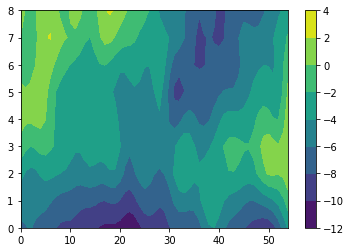

In [2]:
# load data
# cfl_path = '/Users/imanwahle/Desktop/cfl' # set this to your own cfl location
cfl_path = 'C:/Users/yumen/Documents/Schmidt Academy/cfl'

X, Y, coords = joblib.load(os.path.join(cfl_path, 'data/el_nino/elnino_data.pkl'))
imshape = (55, 9)
X = X[:200,:]
Y = Y[:200,:]
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

# plot an example image
plt.contourf(X[0].reshape(imshape).T)
plt.colorbar()
plt.show()

All results from this run will be saved to C:/Users/yumen/Documents/Schmidt Academy/cfl/examples/exp_results\experiment0003
opt_config not specified in input, defaulting to {}
weights_path not specified in input, defaulting to None
loss not specified in input, defaulting to mean_squared_error
show_plot not specified in input, defaulting to True
name not specified in input, defaulting to CondExpMod
best not specified in input, defaulting to True
Training CFL pipeline.
Train on 150 samples, validate on 50 samples
Epoch 1/2
150/150 [==============================] - 2s 13ms/sample - loss: 5.2602 - val_loss: 1.3236
Epoch 2/2
150/150 [==============================] - 0s 773us/sample - loss: 3.2515 - val_loss: 1.1389


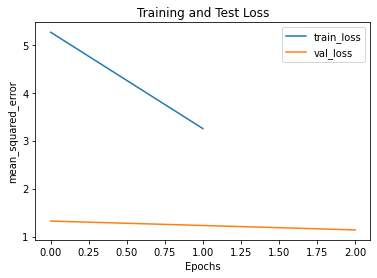

Saving parameters to  C:/Users/yumen/Documents/Schmidt Academy/cfl/examples/exp_results\experiment0003\trained_blocks\CondExpMod


In [3]:
data_info = { 'X_dims' : X.shape, 
              'Y_dims' : Y.shape, 
              'Y_type' : 'continuous' } 

# CDE parameters
lr = 1e-4
CDE_params = { 'batch_size'  : 128,
               'optimizer'   : 'adam',
               'n_epochs'    : 2,
               'verbose'     : True,
               'dense_units' : [1024, 1024, data_info['Y_dims'][1]],
               'activations' : ['linear', 'linear', 'linear'],
               'dropouts'    : [0.2, 0.5, 0.5],
               'standardize' : True,
              }

cluster_params = {  'n_Xclusters' : 4,
                    'n_Yclusters' : 4,
                 }   
                            
block_names = ['CondExpMod', 'Kmeans']
block_params = [CDE_params, cluster_params]

# save_path = '/Users/imanwahle/Desktop/cfl/examples/exp_results'
save_path = 'C:/Users/yumen/Documents/Schmidt Academy/cfl/examples/exp_results'
my_exp = Experiment(X_train=X, Y_train=Y, data_info=data_info, block_names=block_names, block_params=block_params, blocks=None, results_path=save_path)

### ERROR: Y_type had not been originally given in data info, whether that's given should be checked somewhere but im not sure where

In [4]:
# add a new dataset to this experiment's known set of data sets 

my_exp.register_dataset(X=X, Y=Y, dataset_name='dataset_test')

In [5]:
# run the new dataset through the trained cfl pipeline
my_exp.predict('dataset_test')

{'x_lbls': array([1, 3, 0, 2, 2, 3, 2, 2, 1, 0, 3, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 3,
        3, 3, 0, 1, 0, 0, 2, 0, 3, 1, 0, 3, 1, 1, 0, 2, 0, 2, 3, 2, 1, 1,
        3, 1, 2, 1, 2, 3, 0, 1, 1, 0, 3, 0, 0, 0, 3, 3, 1, 2, 3, 3, 0, 3,
        0, 0, 2, 0, 0, 3, 1, 3, 2, 3, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 3, 1,
        0, 3, 1, 0, 1, 0, 2, 3, 2, 0, 1, 3, 2, 2, 2, 0, 0, 1, 0, 3, 0, 0,
        1, 1, 0, 3, 0, 3, 3, 2, 3, 2, 0, 0, 0, 1, 2, 0, 2, 0, 3, 1, 2, 2,
        1, 2, 1, 3, 2, 3, 2, 2, 2, 0, 0, 1, 3, 3, 1, 3, 0, 2, 3, 2, 2, 3,
        2, 1, 3, 3, 2, 2, 3, 3, 3, 0, 2, 3, 2, 3, 3, 0, 2, 2, 3, 3, 3, 0,
        2, 0, 2, 2, 1, 3, 2, 2, 2, 3, 1, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 0,
        2, 0]),
 'y_lbls': array([0, 3, 2, 3, 2, 0, 3, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 3,
        3, 3, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 3, 1, 2, 2, 2, 0, 3, 0, 3, 0,
        1, 0, 3, 0, 2, 2, 2, 0, 0, 2, 3, 2, 2, 2, 3, 3, 3, 2, 0, 3, 2, 0,
        0, 2, 2, 2, 2, 0, 3, 0, 2, 3, 2, 3, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1,
  

In [6]:
# ideas for tests:
    # make sure you get an error when you dont supply block names, params or blocks
    # make sure the model is actually running with the params you specified

In [7]:
# load an experiment from saved experiment results (I think)

my_exp2 = Experiment(X_train=X, Y_train=Y, data_info=data_info, 
            past_exp_path='/Users/imanwahle/Desktop/cfl/examples/exp_results/experiment0026', 
            results_path='/Users/imanwahle/Desktop/cfl/examples/exp_results')

save_path '/Users/imanwahle/Desktop/cfl/examples/exp_results' doesn't exist, creating now.


PermissionError: [WinError 5] Access is denied: '/Users/imanwahle'

In [7]:
my_exp2.register_dataset(X=X, Y=Y, dataset_name='dataset_test')

In [8]:
my_exp2.predict('dataset_test')

100%|██████████| 200/200 [00:00<00:00, 1773.84it/s]


{'x_lbls': array([1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 2, 3, 1, 2, 3, 1, 3, 1, 3, 3, 3, 2,
        2, 1, 3, 1, 3, 3, 0, 3, 2, 1, 3, 1, 1, 1, 3, 0, 3, 0, 2, 0, 1, 1,
        2, 1, 2, 1, 3, 2, 3, 1, 1, 3, 2, 3, 3, 3, 2, 1, 1, 3, 2, 2, 3, 2,
        3, 3, 0, 3, 3, 2, 0, 1, 0, 2, 0, 0, 0, 3, 1, 3, 1, 1, 0, 3, 1, 1,
        3, 2, 1, 3, 1, 3, 2, 2, 0, 3, 1, 2, 0, 0, 0, 3, 3, 1, 3, 2, 3, 3,
        1, 1, 3, 2, 3, 1, 2, 2, 2, 2, 3, 3, 3, 1, 0, 3, 0, 3, 2, 1, 0, 0,
        1, 0, 0, 2, 0, 2, 0, 2, 0, 3, 3, 1, 2, 2, 1, 2, 3, 0, 2, 0, 0, 1,
        0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 3, 0, 2, 2, 2, 2, 3,
        2, 3, 0, 0, 1, 2, 3, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 3,
        0, 3], dtype=int32),
 'y_lbls': array([1, 0, 1, 2, 1, 2, 0, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 1, 0, 1, 2, 2,
        3, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2,
        1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 3, 2